https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_blob.html

In [1]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
%matplotlib inline

import matplotlib.pyplot as plt

/Users/robincole/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [95]:
image = data.hubble_deep_field()[0:500, 0:500]
# image = data.moon() # [0:500, 0:500]
image_gray = rgb2gray(image)

In [96]:
help(blob_log)

Help on function blob_log in module skimage.feature.blob:

blob_log(image, min_sigma=1, max_sigma=50, num_sigma=10, threshold=0.2, overlap=0.5, log_scale=False)
    Finds blobs in the given grayscale image.
    
    Blobs are found using the Laplacian of Gaussian (LoG) method [1]_.
    For each blob found, the method returns its coordinates and the standard
    deviation of the Gaussian kernel that detected the blob.
    
    Parameters
    ----------
    image : 2D or 3D ndarray
        Input grayscale image, blobs are assumed to be light on dark
        background (white on black).
    min_sigma : float, optional
        The minimum standard deviation for Gaussian Kernel. Keep this low to
        detect smaller blobs.
    max_sigma : float, optional
        The maximum standard deviation for Gaussian Kernel. Keep this high to
        detect larger blobs.
    num_sigma : int, optional
        The number of intermediate values of standard deviations to consider
        between `min_sig

Increase `min_sigma` to filter out the smallest blobs

In [97]:
blobs_log = blob_log(image_gray, min_sigma=1, max_sigma=50, num_sigma=10, threshold=.1)

In [98]:
# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

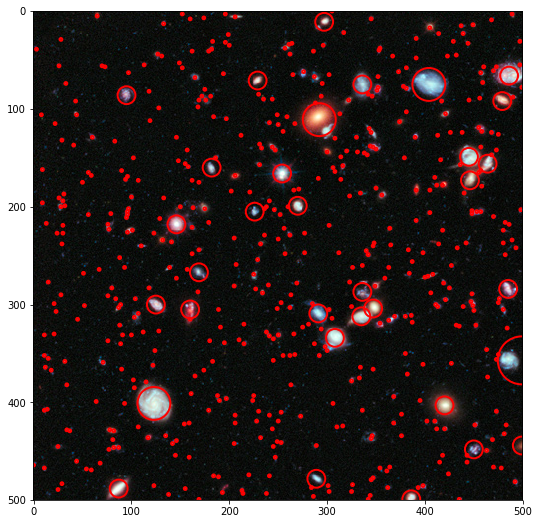

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
ax.imshow(image)
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)

## Distribution of blob sizes

In [100]:
radii = blobs_log[:,2]

In [101]:
len(radii)

547

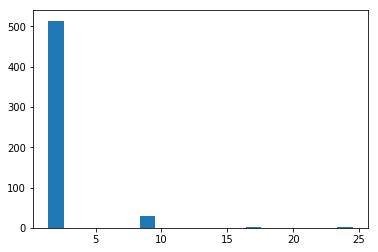

In [102]:
plt.hist(radii, bins=20);